In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from random import uniform
import math

In [2]:
def inp(w, x, b):
    return w * x + b


def out(t):
    return np.tanh(t)


def neuron(w, x, b):
    return out(inp(w, x, b))


def tanh_deriv(x):
    t = np.tanh(x)**2
    return 1.0 - t


def neuron_der_b(w, x, b):
    return tanh_deriv(inp(w, x, b))
  
    
def neuron_der_w(w, x, b):
    return tanh_deriv(inp(w, x, b)) * x


def pred(x, w11_x, w11_b, w21_x, w2_b):
    return (w21_x * neuron(w11_x, x, w11_b) + w2_b)


def func(x):
    return np.sin(math.pi / 2 * x - math.pi / 2)


def loss(x, w11_x, w11_b, w21_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w21_x, w2_b)
        sq = (p - func(item)) * (p - func(item))
        l = l + sq
    print "Loss = " + str(l)
    return l


def loss_deriv_w2_b(x, w11_x, w11_b, w21_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w21_x, w2_b)
        sq = 2 * (p - func(item))
        l = l + sq
#    print "Loss_deriv_w2_b = " + str(l)
    return l


def loss_deriv_w21_x(x, w11_x, w11_b, w21_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w21_x, w2_b)
        sq = 2 * (p - func(item)) * neuron(w11_x, item, w11_b)
        l = l + sq
#    print "Loss_deriv_w21_x = " + str(l)
    return l    



def loss_deriv_w11_x(x, w11_x, w11_b, w21_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w21_x, w2_b)
        sq = 2 * (p - func(item)) * w21_x * neuron_der_w(w11_x, item, w11_b)
        l = l + sq
#    print "Loss_deriv_w21_x = " + str(l)
    return l    


def loss_deriv_w11_b(x, w11_x, w11_b, w21_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w21_x, w2_b)
        sq = 2 * (p - func(item)) * w21_x * neuron_der_b(w11_x, item, w11_b)
        l = l + sq
#    print "Loss_deriv_w11_b = " + str(l)
    return l



In [3]:
epochs = 1000

step_lin_w_x = 0.001
step_lin_w_b = 0.01

#x = np.arange(0, math.pi, 0.05)
x = np.arange(0, 1.05, 0.05)
print x
y = func(x)
print y

w11_x = uniform(0, 1)
w11_b = uniform(0, 1)

w12_x = uniform(0, 1)
w12_b = uniform(0, 1)

w21_x = uniform(0, 1)
w22_x = uniform(0, 1)

w2_b  = uniform(0, 1)


[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.  ]
[-1.         -0.99691733 -0.98768834 -0.97236992 -0.95105652 -0.92387953
 -0.89100652 -0.85264016 -0.80901699 -0.76040597 -0.70710678 -0.64944805
 -0.58778525 -0.52249856 -0.4539905  -0.38268343 -0.30901699 -0.23344536
 -0.15643447 -0.0784591   0.        ]


<IPython.core.display.Javascript object>


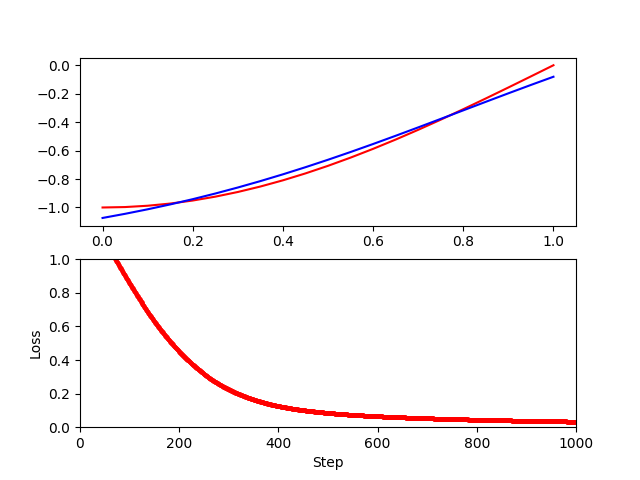

(0, 1)

In [4]:
#fig,(ax1, ax2, ax3, ax4) = plt.subplots(4,1, sharex = False, sharey = False)

fig,(ax1, ax2) = plt.subplots(2,1, sharex = False, sharey = False)

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(0, 1.05)
ax1.set_ylim(0, 2)
ax1.set_xlabel("X")
ax1.plot(x, y, color = 'r')

ax2.set_xlabel("Step")
ax2.set_ylabel("Loss")
ax2.set_xlim(0, epochs)
ax2.set_ylim(0, 1)



In [5]:
for i in range(epochs):
    l = loss(x, w11_x, w11_b, w21_x, w2_b)
    ax2.scatter(i, l, color = 'r', s=5)
    
    w21_x_new = w21_x - step_lin_w_x * loss_deriv_w21_x(x, w11_x, w11_b, w21_x, w2_b)

    w2_b_new = w2_b - step_lin_w_b * loss_deriv_w2_b(x, w11_x, w11_b, w21_x, w2_b)

    w11_x_new = w11_x - step_lin_w_x * loss_deriv_w11_x(x, w11_x, w11_b, w21_x, w2_b)
    w11_b_new = w11_b - step_lin_w_b * loss_deriv_w11_b(x, w11_x, w11_b, w21_x, w2_b)
        
    w21_x = w21_x_new
    w2_b = w2_b_new
    
    w11_x = w11_x_new
    w11_b = w11_b_new
 
    print "w11_x = " + str(w11_x)
    print "w11_b = " + str(w11_b)
    print "w21_x = " + str(w21_x)
    print "w2_b = " + str(w2_b)
    
    z = pred(x, w11_x, w11_b, w21_x, w2_b)
    ax1.clear()
    #print x
    #print y
    ax1.plot(x, y, color = 'r')
    ax1.plot(x, z, color = 'b')
    
    fig.canvas.draw()
    


Loss = 40.2448141012
w11_x = 0.719338552558
w11_b = -0.160338689753
w21_x = 0.327800482254
w2_b = 0.0401918250607
Loss = 12.6307939513
w11_x = 0.715676363907
w11_b = -0.256152283591
w21_x = 0.324115417619
w2_b = -0.267118736041
Loss = 4.63831913904
w11_x = 0.714036161579
w11_b = -0.308616278106
w21_x = 0.324662688063
w2_b = -0.432633253483
Loss = 2.31567993528
w11_x = 0.71355394927
w11_b = -0.337197456648
w21_x = 0.326414493246
w2_b = -0.521747848788
Loss = 1.63831681669
w11_x = 0.71371706327
w11_b = -0.352766698492
w21_x = 0.328490316646
w2_b = -0.569696039555
Loss = 1.43832323833
w11_x = 0.714235768271
w11_b = -0.361276872453
w21_x = 0.330644495807
w2_b = -0.595480263217
Loss = 1.37660761698
w11_x = 0.714949793839
w11_b = -0.365966351454
w21_x = 0.33281223972
w2_b = -0.609343567471
Loss = 1.35486446848
w11_x = 0.71577140332
w11_b = -0.368591991404
w21_x = 0.334978350367
w2_b = -0.616802007942
Loss = 1.34465221413
w11_x = 0.71665283161
w11_b = -0.37010539231
w21_x = 0.337140338231
w2_

Loss = 0.985816536746
w11_x = 0.784961466371
w11_b = -0.397173439634
w21_x = 0.474168781926
w2_b = -0.627698030073
Loss = 0.980650087871
w11_x = 0.786057305096
w11_b = -0.397712364083
w21_x = 0.476150937547
w2_b = -0.627696748286
Loss = 0.975493801364
w11_x = 0.787154074965
w11_b = -0.398254824154
w21_x = 0.47812989038
w2_b = -0.627694138181
Loss = 0.970347810181
w11_x = 0.788251739533
w11_b = -0.39880077441
w21_x = 0.480105621961
w2_b = -0.627690194905
Loss = 0.96521224709
w11_x = 0.789350262438
w11_b = -0.399350169529
w21_x = 0.482078113811
w2_b = -0.627684913848
Loss = 0.96008724465
w11_x = 0.790449607404
w11_b = -0.399902964313
w21_x = 0.484047347442
w2_b = -0.62767829064
Loss = 0.954972935178
w11_x = 0.791549738238
w11_b = -0.400459113701
w21_x = 0.486013304353
w2_b = -0.627670321142
Loss = 0.949869450727
w11_x = 0.792650618836
w11_b = -0.401018572776
w21_x = 0.487975966038
w2_b = -0.627661001442
Loss = 0.944776923053
w11_x = 0.793752213183
w11_b = -0.401581296775
w21_x = 0.489935

Loss = 0.647185536214
w11_x = 0.864177814206
w11_b = -0.442523630545
w21_x = 0.607618189906
w2_b = -0.62410112393
Loss = 0.643053620926
w11_x = 0.865254282995
w11_b = -0.443214780433
w21_x = 0.609324359983
w2_b = -0.624001290433
Loss = 0.638939518047
w11_x = 0.866329375487
w11_b = -0.443906844307
w21_x = 0.611026113576
w2_b = -0.623900123991
Loss = 0.634843289436
w11_x = 0.86740306567
w11_b = -0.444599797271
w21_x = 0.612723437523
w2_b = -0.623797626425
Loss = 0.630764995416
w11_x = 0.868475327735
w11_b = -0.445293614743
w21_x = 0.614416318809
w2_b = -0.623693799554
Loss = 0.62670469477
w11_x = 0.869546136079
w11_b = -0.445988272459
w21_x = 0.616104744572
w2_b = -0.623588645193
Loss = 0.622662444734
w11_x = 0.870615465302
w11_b = -0.446683746471
w21_x = 0.617788702102
w2_b = -0.62348216515
Loss = 0.618638300992
w11_x = 0.871683290209
w11_b = -0.44738001314
w21_x = 0.619468178844
w2_b = -0.623374361228
Loss = 0.614632317673
w11_x = 0.872749585816
w11_b = -0.448077049142
w21_x = 0.621143

Loss = 0.394523325765
w11_x = 0.937758822488
w11_b = -0.494149185098
w21_x = 0.71992357622
w2_b = -0.613410446045
Loss = 0.391758308053
w11_x = 0.938679927085
w11_b = -0.494859343084
w21_x = 0.721283230261
w2_b = -0.613217276152
Loss = 0.389011633601
w11_x = 0.93959833169
w11_b = -0.495569312885
w21_x = 0.722637960261
w2_b = -0.613022868858
Loss = 0.38628325941
w11_x = 0.940514026433
w11_b = -0.4962790876
w21_x = 0.723987766039
w2_b = -0.612827224922
Loss = 0.383573141401
w11_x = 0.94142700166
w11_b = -0.496988660495
w21_x = 0.725332647594
w2_b = -0.612630345093
Loss = 0.380881234427
w11_x = 0.942337247931
w11_b = -0.497698025004
w21_x = 0.726672605107
w2_b = -0.612432230112
Loss = 0.378207492287
w11_x = 0.943244756021
w11_b = -0.498407174726
w21_x = 0.728007638937
w2_b = -0.612232880713
Loss = 0.375551867743
w11_x = 0.944149516919
w11_b = -0.499116103425
w21_x = 0.729337749624
w2_b = -0.612032297623
Loss = 0.372914312532
w11_x = 0.945051521827
w11_b = -0.499824805025
w21_x = 0.7306629

Loss = 0.238857682548
w11_x = 0.996797588351
w11_b = -0.544536005301
w21_x = 0.805397350599
w2_b = -0.596381971121
Loss = 0.237254233848
w11_x = 0.997510948618
w11_b = -0.545223174342
w21_x = 0.806411968697
w2_b = -0.596101584252
Loss = 0.23566415102
w11_x = 0.998221389778
w11_b = -0.545909983158
w21_x = 0.807422060791
w2_b = -0.595820018386
Loss = 0.234087350629
w11_x = 0.998928914746
w11_b = -0.546596432562
w21_x = 0.808427637325
w2_b = -0.595537274742
Loss = 0.232523749167
w11_x = 0.999633526569
w11_b = -0.547282523419
w21_x = 0.809428708849
w2_b = -0.595253354556
Loss = 0.230973263069
w11_x = 1.00033522842
w11_b = -0.547968256642
w21_x = 0.810425286013
w2_b = -0.594968259086
Loss = 0.229435808719
w11_x = 1.00103402361
w11_b = -0.548653633198
w21_x = 0.81141737957
w2_b = -0.594681989609
Loss = 0.227911302463
w11_x = 1.00172991556
w11_b = -0.549338654095
w21_x = 0.812405000372
w2_b = -0.594394547424
Loss = 0.22639966062
w11_x = 1.00242290782
w11_b = -0.550023320395
w21_x = 0.81338815

Loss = 0.150965857877
w11_x = 1.04201848659
w11_b = -0.594506735459
w21_x = 0.869029843269
w2_b = -0.572554745991
Loss = 0.150132024457
w11_x = 1.04253058105
w11_b = -0.595171467971
w21_x = 0.869742982469
w2_b = -0.57219197045
Loss = 0.149305750127
w11_x = 1.04304023648
w11_b = -0.595835967767
w21_x = 0.87045256547
w2_b = -0.571828174518
Loss = 0.148486967288
w11_x = 1.04354746188
w11_b = -0.596500236643
w21_x = 0.871158606987
w2_b = -0.571463361434
Loss = 0.14767560873
w11_x = 1.04405226628
w11_b = -0.597164276378
w21_x = 0.871861121746
w2_b = -0.571097534468
Loss = 0.146871607633
w11_x = 1.04455465874
w11_b = -0.597828088734
w21_x = 0.872560124492
w2_b = -0.570730696923
Loss = 0.146074897574
w11_x = 1.04505464835
w11_b = -0.598491675451
w21_x = 0.87325562998
w2_b = -0.57036285213
Loss = 0.145285412524
w11_x = 1.04555224426
w11_b = -0.599155038256
w21_x = 0.873947652975
w2_b = -0.569994003455
Loss = 0.14450308685
w11_x = 1.04604745564
w11_b = -0.599818178851
w21_x = 0.874636208258
w2_

Loss = 0.106196123144
w11_x = 1.07357808698
w11_b = -0.642506853483
w21_x = 0.912661465187
w2_b = -0.543625437365
Loss = 0.105761592802
w11_x = 1.07393713076
w11_b = -0.643157780413
w21_x = 0.913153662025
w2_b = -0.543198576292
Loss = 0.10533074737
w11_x = 1.07429443712
w11_b = -0.643808535767
w21_x = 0.913643364423
w2_b = -0.542771009464
Loss = 0.104903548263
w11_x = 1.07465001565
w11_b = -0.644459119173
w21_x = 0.914130586137
w2_b = -0.542342742171
Loss = 0.104479957256
w11_x = 1.07500387593
w11_b = -0.645109530229
w21_x = 0.914615340887
w2_b = -0.541913779728
Loss = 0.104059936481
w11_x = 1.07535602753
w11_b = -0.645759768495
w21_x = 0.91509764236
w2_b = -0.541484127468
Loss = 0.103643448424
w11_x = 1.07570647999
w11_b = -0.646409833495
w21_x = 0.915577504204
w2_b = -0.541053790745
Loss = 0.103230455926
w11_x = 1.07605524285
w11_b = -0.647059724721
w21_x = 0.916054940033
w2_b = -0.540622774936
Loss = 0.102820922177
w11_x = 1.07640232563
w11_b = -0.64770944163
w21_x = 0.916529963424


Loss = 0.0821195552935
w11_x = 1.09579696277
w11_b = -0.689514254984
w21_x = 0.942848955066
w2_b = -0.510958054596
Loss = 0.0818727081412
w11_x = 1.09605304911
w11_b = -0.690149648127
w21_x = 0.943192686393
w2_b = -0.510494598443
Loss = 0.0816275433974
w11_x = 1.0963080369
w11_b = -0.690784759906
w21_x = 0.943534816974
w2_b = -0.510030860666
Loss = 0.0813840431742
w11_x = 1.09656193379
w11_b = -0.691419587864
w21_x = 0.943875357315
w2_b = -0.509566847306
Loss = 0.0811421897889
w11_x = 1.09681474738
w11_b = -0.692054129524
w21_x = 0.944214317866
w2_b = -0.509102564406
Loss = 0.0809019657627
w11_x = 1.09706648526
w11_b = -0.692688382392
w21_x = 0.94455170903
w2_b = -0.508638018003
Loss = 0.0806633538183
w11_x = 1.09731715498
w11_b = -0.693322343958
w21_x = 0.944887541161
w2_b = -0.508173214133
Loss = 0.0804263368779
w11_x = 1.09756676403
w11_b = -0.693956011693
w21_x = 0.945221824562
w2_b = -0.507708158828
Loss = 0.0801908980616
w11_x = 1.09781531991
w11_b = -0.694589383052
w21_x = 0.945

Loss = 0.0676043758489
w11_x = 1.1120417664
w11_b = -0.734991417495
w21_x = 0.964333434195
w2_b = -0.476753597775
Loss = 0.067444129683
w11_x = 1.11223556958
w11_b = -0.735599082819
w21_x = 0.964584812642
w2_b = -0.476284935735
Loss = 0.067284689218
w11_x = 1.11242873985
w11_b = -0.736206262491
w21_x = 0.96483522682
w2_b = -0.475816405634
Loss = 0.0671260470654
w11_x = 1.11262128228
w11_b = -0.736812953687
w21_x = 0.965084683672
w2_b = -0.475348012471
Loss = 0.0669681959277
w11_x = 1.11281320193
w11_b = -0.737419153589
w21_x = 0.965333190097
w2_b = -0.474879761222
Loss = 0.0668111285973
w11_x = 1.11300450379
w11_b = -0.73802485939
w21_x = 0.965580752948
w2_b = -0.474411656836
Loss = 0.0666548379552
w11_x = 1.11319519285
w11_b = -0.738630068289
w21_x = 0.965827379033
w2_b = -0.473943704239
Loss = 0.0664993169699
w11_x = 1.11338527406
w11_b = -0.739234777494
w21_x = 0.966073075114
w2_b = -0.473475908331
Loss = 0.0663445586966
w11_x = 1.11357475231
w11_b = -0.739838984222
w21_x = 0.966317

Loss = 0.0576480685532
w11_x = 1.12480645973
w11_b = -0.777911383869
w21_x = 0.980534792747
w2_b = -0.443169625748
Loss = 0.0575318056504
w11_x = 1.12496540346
w11_b = -0.778476932149
w21_x = 0.980731377904
w2_b = -0.442722027522
Loss = 0.0574159890873
w11_x = 1.12512400227
w11_b = -0.779041824014
w21_x = 0.980927396477
w2_b = -0.442274852225
Loss = 0.0573006157766
w11_x = 1.12528225903
w11_b = -0.77960605779
w21_x = 0.981122852533
w2_b = -0.441828102722
Loss = 0.0571856826646
w11_x = 1.12544017662
w11_b = -0.780169631822
w21_x = 0.981317750108
w2_b = -0.441381781844
Loss = 0.0570711867319
w11_x = 1.12559775787
w11_b = -0.780732544478
w21_x = 0.981512093205
w2_b = -0.440935892393
Loss = 0.0569571249918
w11_x = 1.1257550056
w11_b = -0.781294794145
w21_x = 0.981705885792
w2_b = -0.440490437141
Loss = 0.0568434944907
w11_x = 1.1259119226
w11_b = -0.781856379233
w21_x = 0.981899131808
w2_b = -0.440045418826
Loss = 0.0567302923071
w11_x = 1.12606851164
w11_b = -0.782417298172
w21_x = 0.9820

w21_x = 0.993287537262
w2_b = -0.412575403646
Loss = 0.0502632740915
w11_x = 1.13551728963
w11_b = -0.816875082407
w21_x = 0.993452316016
w2_b = -0.41216323751
Loss = 0.0501728861272
w11_x = 1.13565743433
w11_b = -0.817390356491
w21_x = 0.993616746369
w2_b = -0.411751624584
Loss = 0.0500827869984
w11_x = 1.13579738648
w11_b = -0.817904907648
w21_x = 0.993780830525
w2_b = -0.411340565737
Loss = 0.0499929751852
w11_x = 1.13593714753
w11_b = -0.818418735696
w21_x = 0.993944570667
w2_b = -0.410930061814
Loss = 0.0499034491807
w11_x = 1.1360767189
w11_b = -0.81893184047
w21_x = 0.994107968959
w2_b = -0.410520113637
Loss = 0.0498142074907
w11_x = 1.13621610201
w11_b = -0.819444221824
w21_x = 0.994271027544
w2_b = -0.410110722002
Loss = 0.0497252486333
w11_x = 1.13635529826
w11_b = -0.81995587963
w21_x = 0.994433748547
w2_b = -0.409701887685
Loss = 0.049636571139
w11_x = 1.13649430903
w11_b = -0.820466813779
w21_x = 0.994596134073
w2_b = -0.409293611439
Loss = 0.0495481735507
w11_x = 1.136633

w21_x = 1.00437404987
w2_b = -0.384343269234
Loss = 0.0444142165859
w11_x = 1.14518777875
w11_b = -0.85213349738
w21_x = 1.00451833682
w2_b = -0.383971916131
Loss = 0.0443413671916
w11_x = 1.14531697018
w11_b = -0.852597234826
w21_x = 1.00466239166
w2_b = -0.383601128274
Loss = 0.0442687223945
w11_x = 1.14544604131
w11_b = -0.853060276317
w21_x = 1.0048062155
w2_b = -0.383230905252
Loss = 0.0441962812993
w11_x = 1.14557499276
w11_b = -0.85352262269
w21_x = 1.00494980947
w2_b = -0.382861246643
Loss = 0.0441240430159
w11_x = 1.14570382517
w11_b = -0.853984274793
w21_x = 1.00509317466
w2_b = -0.382492152012
Loss = 0.0440520066603
w11_x = 1.14583253918
w11_b = -0.854445233481
w21_x = 1.00523631218
w2_b = -0.382123620914
Loss = 0.0439801713538
w11_x = 1.1459611354
w11_b = -0.85490549962
w21_x = 1.00537922311
w2_b = -0.38175565289
Loss = 0.0439085362234
w11_x = 1.14608961445
w11_b = -0.855365074086
w21_x = 1.00552190852
w2_b = -0.381388247472
Loss = 0.0438371004017
w11_x = 1.14621797693
w11_

Loss = 0.0396438185182
w11_x = 1.15421363721
w11_b = -0.883801785409
w21_x = 1.0143570521
w2_b = -0.358683540819
Loss = 0.0395837047846
w11_x = 1.15433543304
w11_b = -0.884218000104
w21_x = 1.01448680324
w2_b = -0.358351779993
Loss = 0.0395237431606
w11_x = 1.15445713973
w11_b = -0.88463359653
w21_x = 1.01461638253
w2_b = -0.358020531489
Loss = 0.039463933058
w11_x = 1.15457875754
w11_b = -0.885048575925
w21_x = 1.01474579056
w2_b = -0.357689794366
Loss = 0.0394042738913
w11_x = 1.15470028676
w11_b = -0.885462939525
w21_x = 1.0148750279
w2_b = -0.357359567682
Loss = 0.0393447650785
w11_x = 1.15482172763
w11_b = -0.885876688571
w21_x = 1.01500409513
w2_b = -0.357029850489
Loss = 0.0392854060405
w11_x = 1.15494308043
w11_b = -0.886289824305
w21_x = 1.01513299282
w2_b = -0.356700641837
Loss = 0.0392261962014
w11_x = 1.1550643454
w11_b = -0.886702347969
w21_x = 1.01526172154
w2_b = -0.356371940774
Loss = 0.0391671349884
w11_x = 1.15518552282
w11_b = -0.887114260809
w21_x = 1.01539028185
w2

Loss = 0.0356217956483
w11_x = 1.16288436041
w11_b = -0.912638698909
w21_x = 1.0234091246
w2_b = -0.335750499545
Loss = 0.0355714143908
w11_x = 1.1630001997
w11_b = -0.913013081596
w21_x = 1.0235276187
w2_b = -0.335453545432
Loss = 0.0355211493933
w11_x = 1.16311596334
w11_b = -0.913386937579
w21_x = 1.02364597375
w2_b = -0.335157030883
Loss = 0.0354710002502
w11_x = 1.16323165143
w11_b = -0.913760268083
w21_x = 1.02376419008
w2_b = -0.334860954895
Loss = 0.0354209665575
w11_x = 1.16334726411
w11_b = -0.914133074334
w21_x = 1.02388226804
w2_b = -0.334565316467
Loss = 0.0353710479133
w11_x = 1.1634628015
w11_b = -0.914505357552
w21_x = 1.02400020796
w2_b = -0.334270114597
Loss = 0.0353212439178
w11_x = 1.1635782637
w11_b = -0.914877118961
w21_x = 1.02411801018
w2_b = -0.333975348285
Loss = 0.0352715541728
w11_x = 1.16369365084
w11_b = -0.915248359778
w21_x = 1.02423567503
w2_b = -0.333681016534
Loss = 0.0352219782822
w11_x = 1.16380896304
w11_b = -0.915619081222
w21_x = 1.02435320285
w2